# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

### (1) 경로 설정

In [1]:
!pip install -r requirements.txt

#### 2) 라이브러리 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

from scipy.stats import f_oneway

### (3) 데이터 불러오기

In [6]:
file1 = 'data1.pkl'

In [46]:
df=joblib.load(file1)

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [8]:
def summarize_data(df):
    # 숫자형 열에 대한 기초 통계량 계산
    numeric_stats = df.describe()

    # 범주형 열에 대한 빈도수 및 비율 계산
    cat_col = df.select_dtypes(include=['object', 'category']).columns
    cat_stats = {}
    for col in cat_col:
        freq_counts = df[col].value_counts()
        freq_percentage = df[col].value_counts(normalize=True) * 100
        cat_stats[col] = {'Frequency': freq_counts, 'Percentage': freq_percentage}

    # 결과 출력
    print("================= Numeric Summary =================")
    print(numeric_stats)
    print("\n================= Categorical Summary =================")
    for col, stats in cat_stats.items():
        print(f"--- {col} ---")
        print("Frequency:")
        print(stats['Frequency'])
        print("\nPercentage (%):")
        print(stats['Percentage'])
        print("\n")

    # 숫자형 열에 대한 시각화 (예시: 히스토그램)
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [9]:
df.columns

Index(['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'target', 'weekday', 'month',
       'week', 'year', 'season', 'is_holiday', 'ride_pro', 'humidity', 'temp',
       'is_rainy'],
      dtype='object')

In [47]:
#범주형데이터 형변환
cat_col=[ 'weekday', 'month', 'week', 'year', 'season', 'is_holiday','is_rainy']
df[cat_col]=df[cat_col].astype('category')

================= Numeric Summary =================
           car_cnt  request_cnt     ride_cnt  waiting_time         fare  \
count  2922.000000  2922.000000  2922.000000   2922.000000  2922.000000   
mean    418.701916  3925.607803  3283.895277     40.305681  2304.272416   
std     133.755162  1509.741713  1249.165876     14.098550   107.260080   
min     132.000000   527.000000   462.000000     17.200000  2131.000000   
25%     278.000000  2162.500000  1779.000000     29.600000  2228.000000   
50%     454.000000  4720.500000  3932.500000     38.200000  2257.000000   
75%     522.000000  5110.000000  4241.000000     48.600000  2400.750000   
max    1413.000000  6182.000000  5189.000000     96.100000  2733.000000   

           distance     temp_max     temp_min         temp     rain(mm)  \
count   2922.000000  2921.000000  2921.000000  2921.000000  2921.000000   
mean    9253.500000    18.077405     9.414618    13.746012     3.356761   
std     1019.198152    10.706655    10.784649  

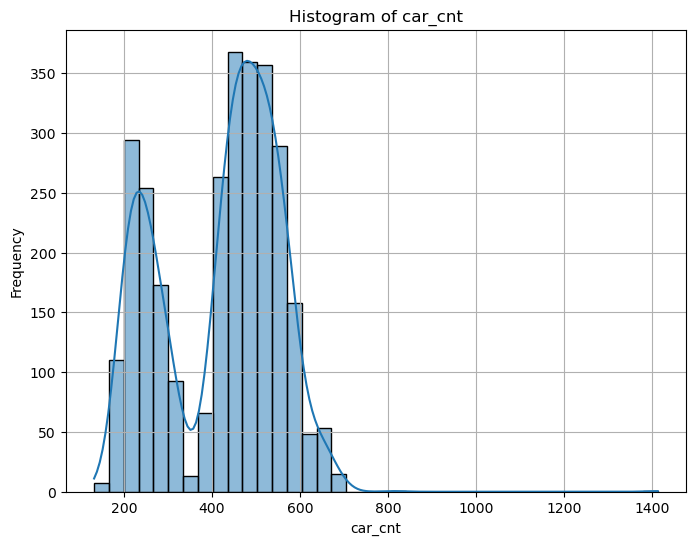

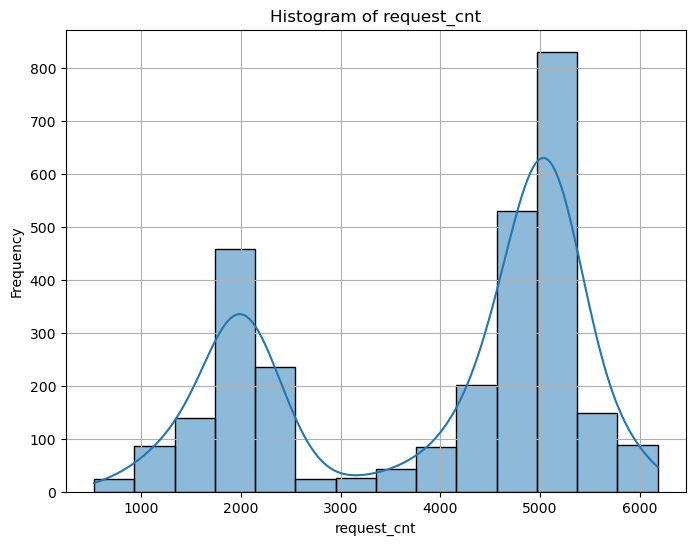

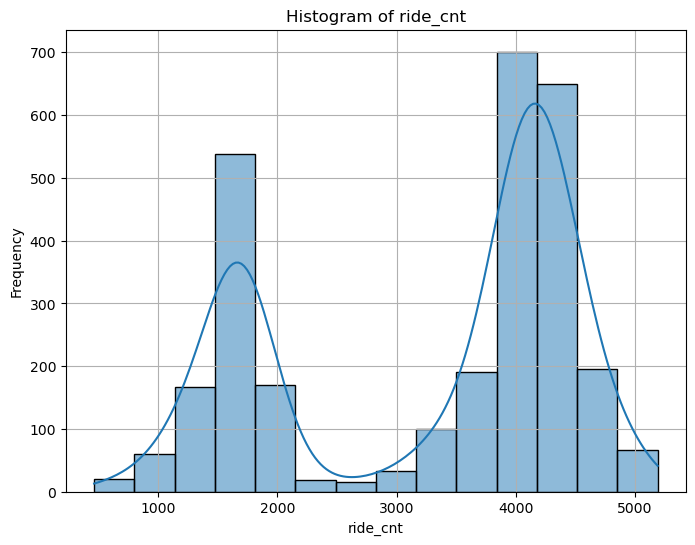

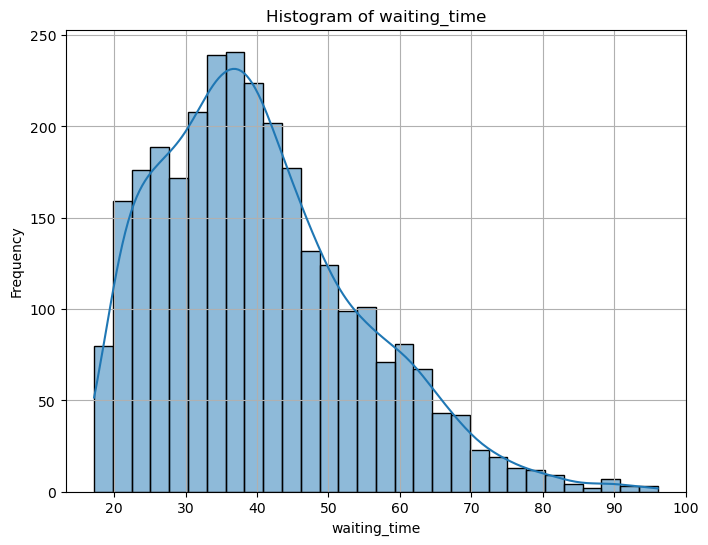

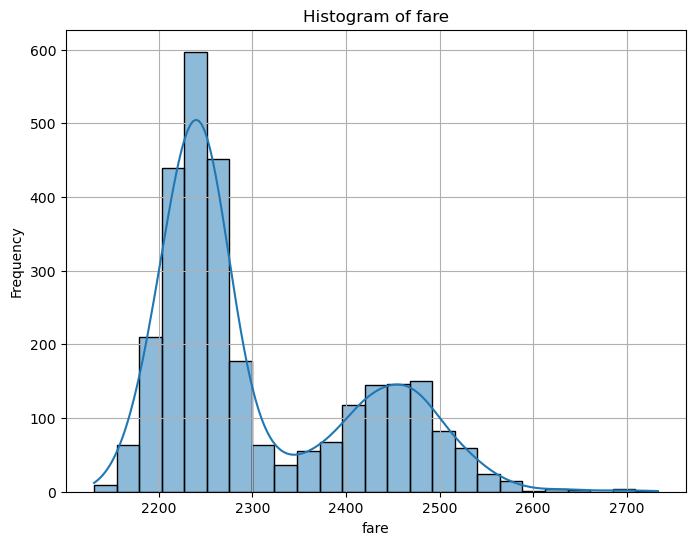

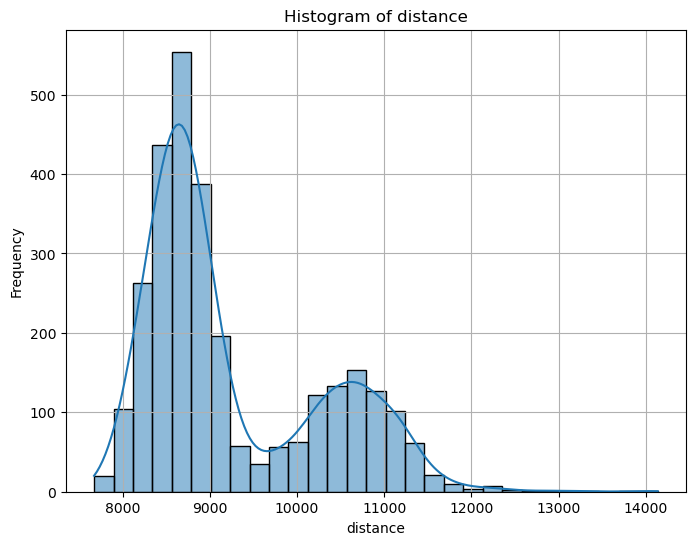

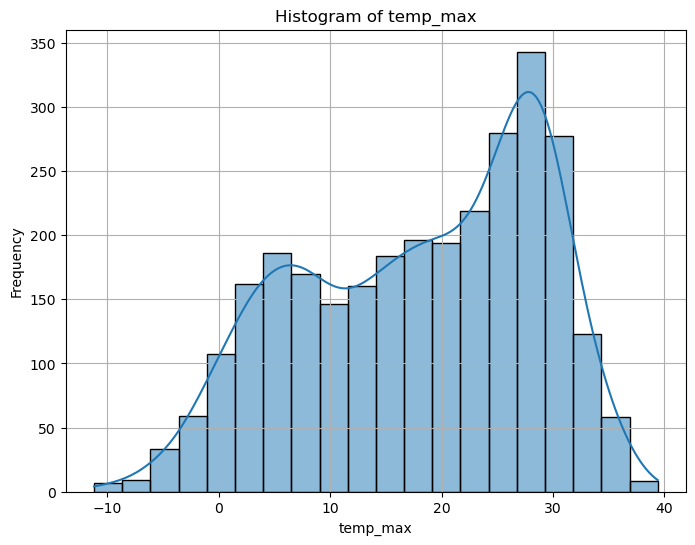

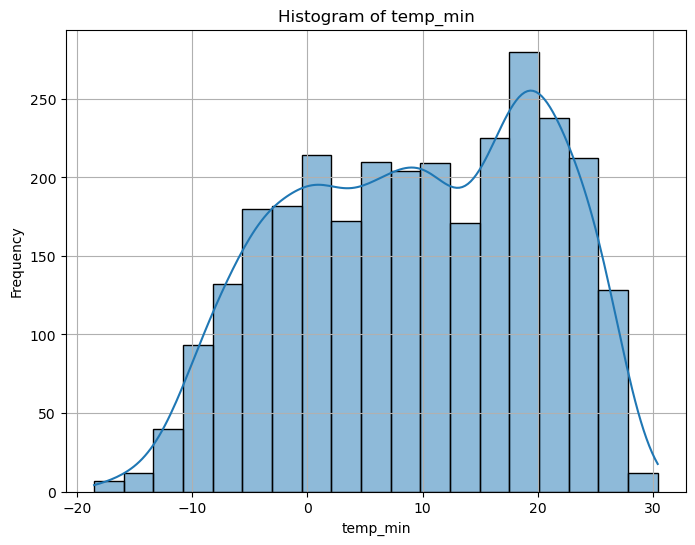

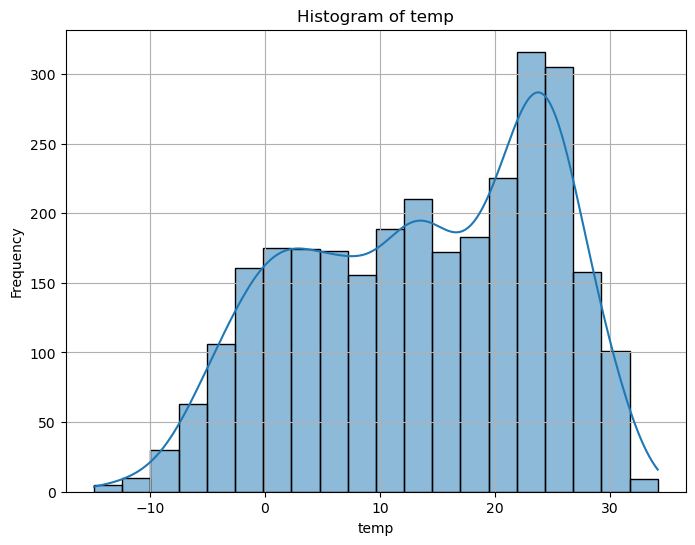

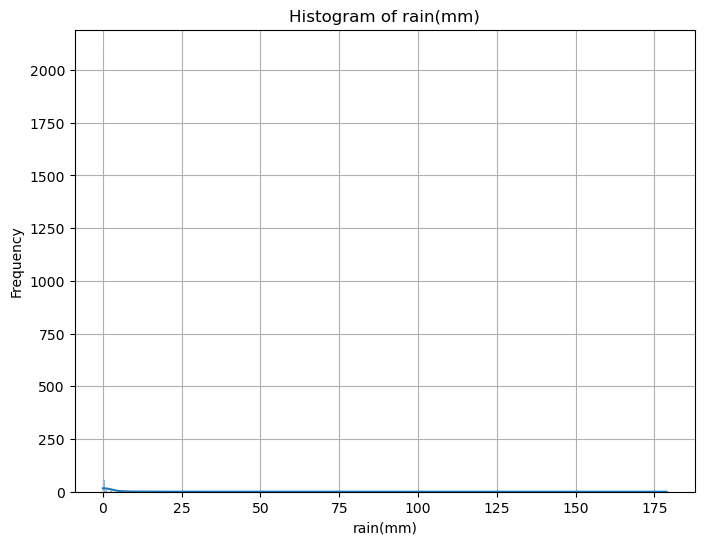

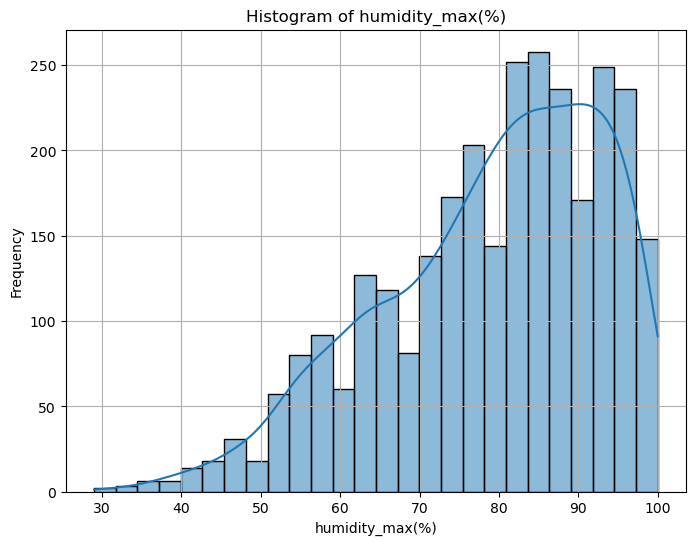

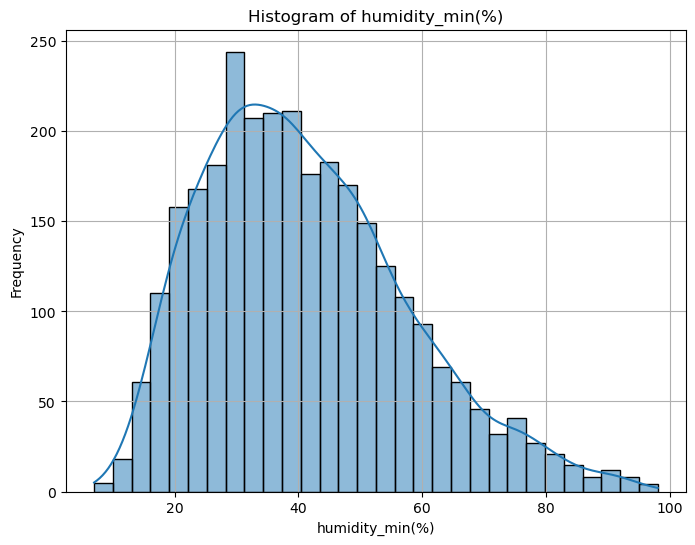

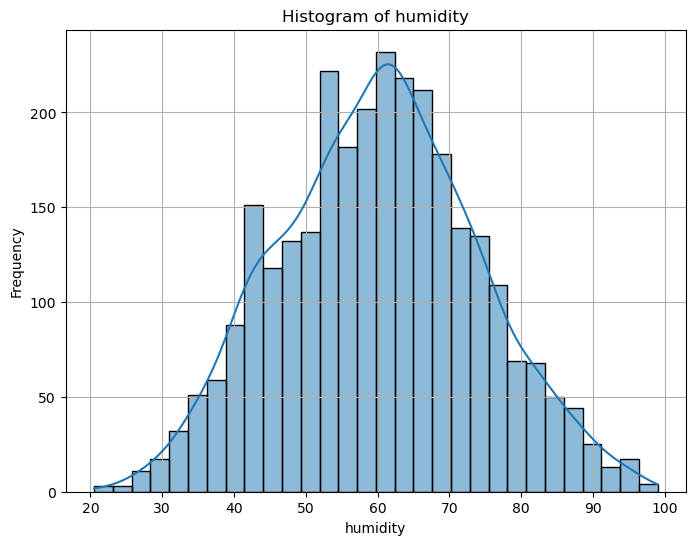

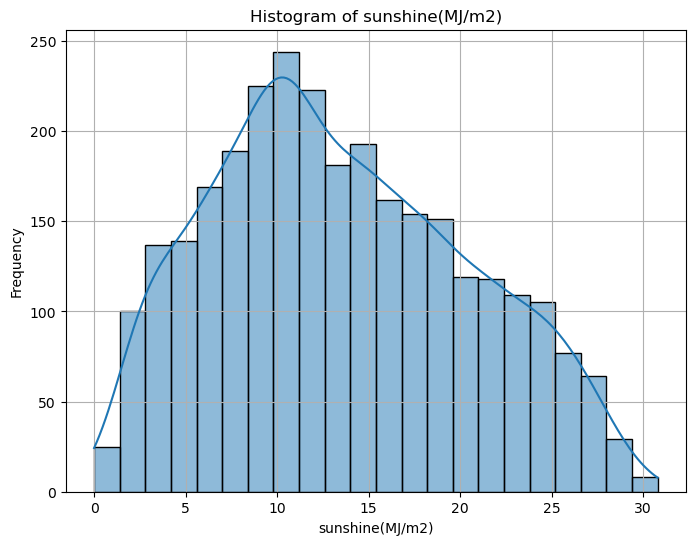

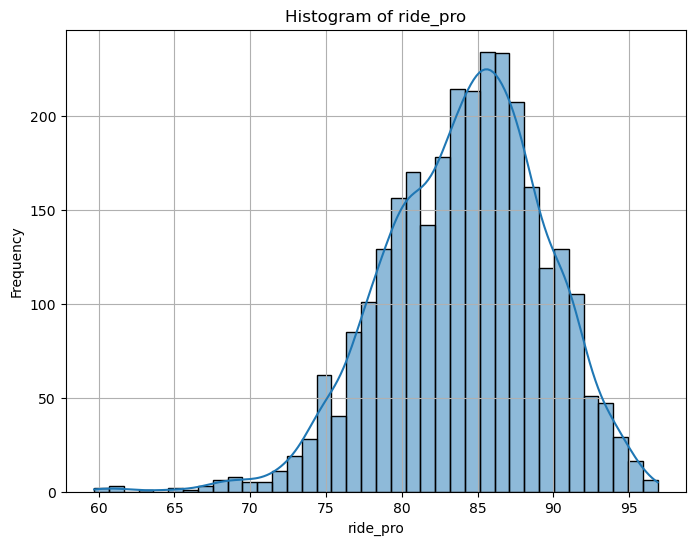

In [48]:
#숫자형 데이터
des_col=['car_cnt', 'request_cnt', 'ride_cnt','waiting_time','fare','distance',
         'temp_max', 'temp_min','temp','rain(mm)','humidity_max(%)', 
         'humidity_min(%)', 'humidity','sunshine(MJ/m2)','ride_pro']
df_des=df[des_col]
summarize_data(df[des_col])

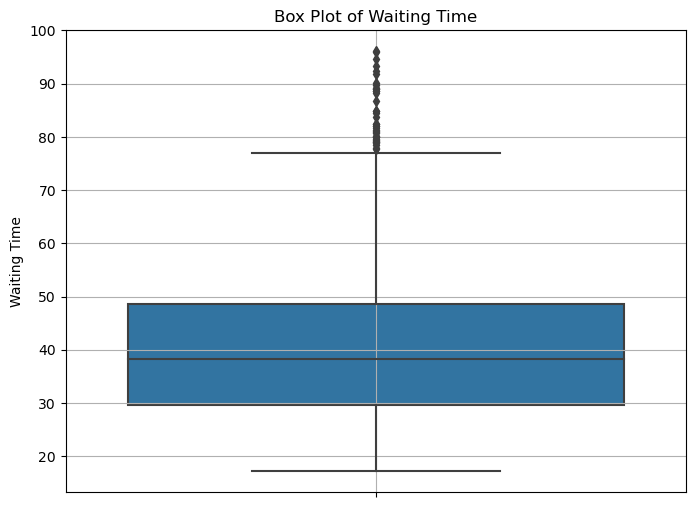

In [12]:
#target=waiting_time 분석
plt.figure(figsize=(8, 6))  # 그래프 크기 설정 (optional)
sns.boxplot(data=df, y='target')

plt.title('Box Plot of Waiting Time')
plt.ylabel('Waiting Time')

plt.grid(True)  
plt.show()

In [11]:
#대기시간의 이상치 확인
waiting_time_above_80 = df[df['waiting_time'] >= 80]
waiting_time_above_80

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),...,weekday,month,week,year,season,is_holiday,ride_pro,humidity,temp,is_rainy
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-26,242,2376,1673,84.5,2528,11275,26.5,19.0,0.0,75.0,...,5,8,34,2017,summer,0,70.41,62.5,22.75,0
2017-10-21,261,2549,1742,83.7,2511,11144,23.1,11.1,0.0,68.0,...,5,10,42,2017,autumn,0,68.34,50.5,17.10,0
2017-11-04,236,2243,1615,82.4,2542,11300,15.1,2.9,0.0,72.0,...,5,11,44,2017,autumn,0,72.00,54.0,9.00,0
2017-11-25,238,2268,1432,93.4,2507,10915,7.2,0.5,0.0,98.0,...,5,11,47,2017,autumn,0,63.14,68.5,3.85,0
2017-12-16,214,2150,1493,81.1,2464,10603,-2.5,-10.7,0.0,53.0,...,5,12,50,2017,winter,0,69.44,39.0,-6.60,0
2017-12-22,424,5011,3478,80.0,2230,8605,8.6,5.0,0.0,84.0,...,4,12,51,2017,winter,0,69.41,73.5,6.80,0
2018-09-19,488,5083,3816,80.1,2313,9165,20.1,18.0,5.0,95.0,...,2,9,38,2018,autumn,0,75.07,76.5,19.05,1
2018-09-20,526,5148,3702,89.0,2234,8506,21.8,17.6,18.0,97.0,...,3,9,38,2018,autumn,0,71.91,86.5,19.70,1
2018-09-21,507,4892,3447,89.2,2270,8892,25.4,17.9,6.5,96.0,...,4,9,38,2018,autumn,0,70.46,62.0,21.65,1


### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

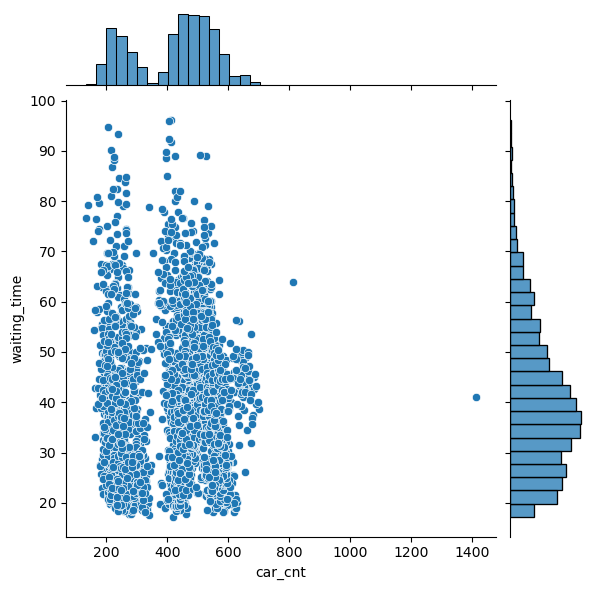

In [12]:
import scipy.stats as spst
sns.jointplot(x='car_cnt', y='waiting_time', data = df)
plt.show()
#regplot, jointplot

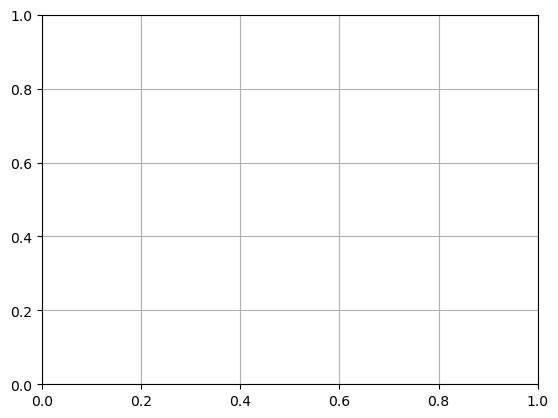

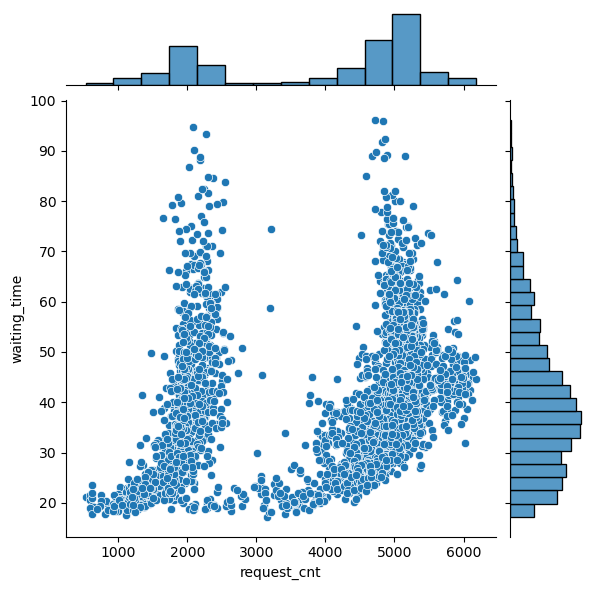

In [13]:
#요청수sns.countplot(x = 'Pclass', data = titanic)
plt.grid()
plt.show()
sns.jointplot(x='request_cnt', y='waiting_time', data = df)
plt.show()

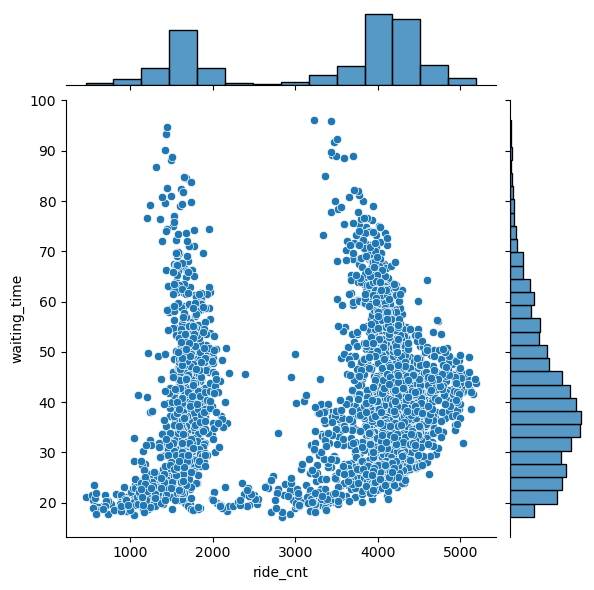

In [14]:
#탐승수  & waititng_time
sns.jointplot(x='ride_cnt', y='waiting_time', data = df)
plt.show()

- 하나의 우상향 그래프가 아닌, 두개의 형태로 이루어지는 이유는?
    
    -> 휴일과 평일의 차이? "YES"

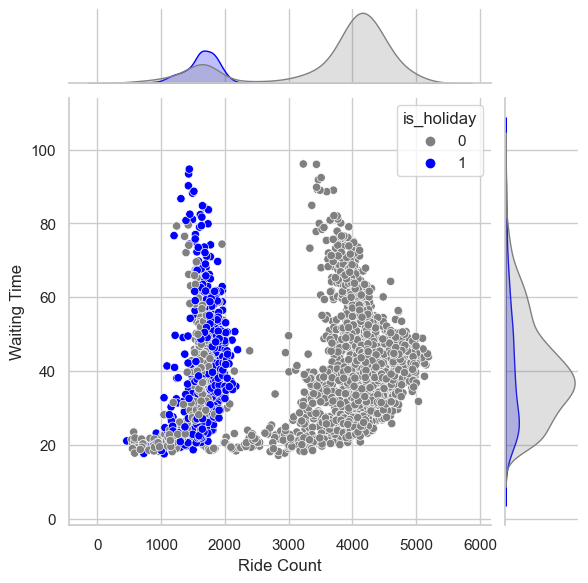

In [15]:
#토요일
df1 = df.copy()
df1.loc[df['weekday'] == 5, 'is_holiday'] = 1

sns.set(style="whitegrid")
g = sns.jointplot(x='ride_cnt', y='waiting_time', data=df1, hue='is_holiday', palette={0: 'gray', 1: 'blue'})
g.set_axis_labels("Ride Count", "Waiting Time")
plt.show()

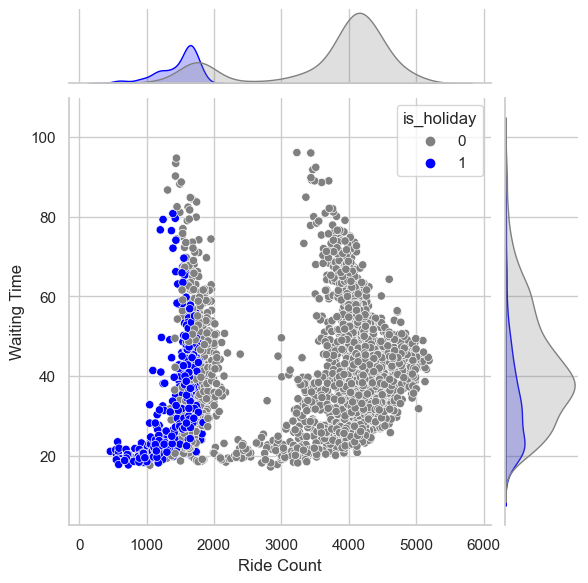

In [16]:
#일요일
df1 = df.copy()
df1.loc[df['weekday'] == 6, 'is_holiday'] = 1

sns.set(style="whitegrid")
g = sns.jointplot(x='ride_cnt', y='waiting_time', data=df1, hue='is_holiday', palette={0: 'gray', 1: 'blue'})
g.set_axis_labels("Ride Count", "Waiting Time")
plt.show()

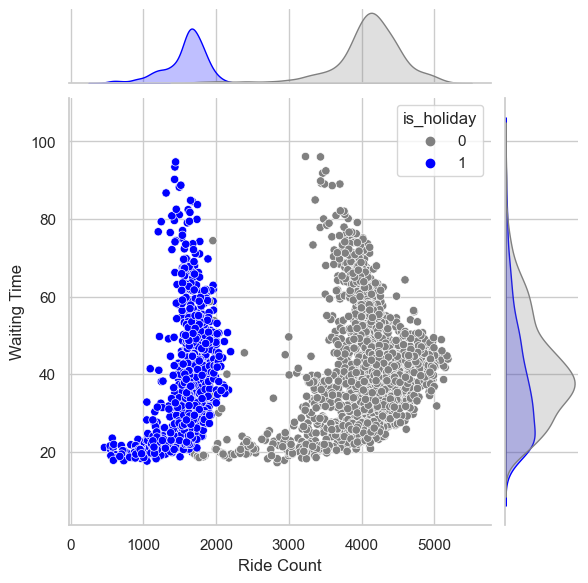

In [49]:
#토 & 일
df1 = df.copy()
df1.loc[(df1['weekday'] == 5) | (df1['weekday'] == 6), 'is_holiday'] = 1

sns.set(style="whitegrid")
g = sns.jointplot(x='ride_cnt', y='waiting_time', data=df1, hue='is_holiday', palette={0: 'gray', 1: 'blue'})
g.set_axis_labels("Ride Count", "Waiting Time")
plt.show()

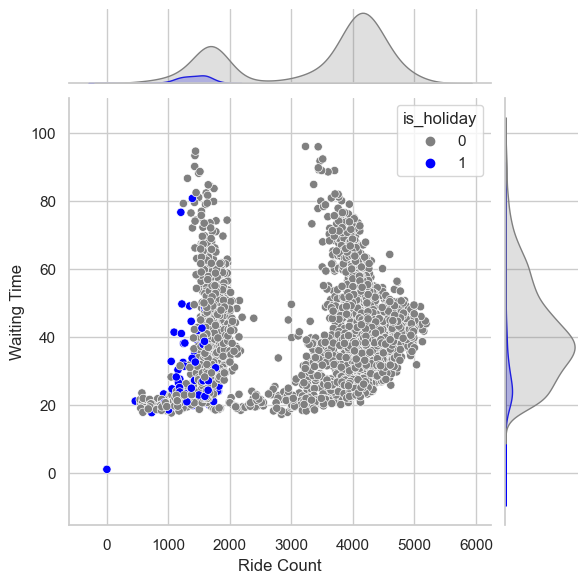

In [18]:
#only holiday
df1 = df.copy()
df1.loc['is_holiday'] = 1

sns.set(style="whitegrid")
g = sns.jointplot(x='ride_cnt', y='waiting_time', data=df1, hue='is_holiday', palette={0: 'gray', 1: 'blue'})
g.set_axis_labels("Ride Count", "Waiting Time")
plt.show()

In [36]:
#주말 holiday=1로 변경
df.loc[(df['weekday'] == 5) | (df['weekday'] == 6), 'is_holiday'] = 1
df

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),...,weekday,month,week,year,season,is_holiday,ride_pro,humidity,temp,is_rainy
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,...,3,1,1,2015,winter,1,90.32,45.5,-5.45,0
2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,...,4,1,1,2015,winter,0,89.90,55.0,-3.40,0
2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,...,5,1,1,2015,winter,1,91.87,73.5,4.20,0
2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,...,6,1,1,2015,winter,1,92.71,73.5,3.50,0
2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,...,0,1,2,2015,winter,0,87.76,63.5,-1.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,603,5555,4605,39.2,2163,7889,3.0,-7.3,0.0,86.0,...,0,12,52,2022,winter,0,82.90,68.5,-2.15,0
2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,92.0,...,1,12,52,2022,winter,0,82.59,66.0,-2.85,0
2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,71.0,...,2,12,52,2022,winter,0,82.21,52.5,-3.05,0


In [50]:
df['is_holiday'].value_counts()

0    2788
1     134
Name: is_holiday, dtype: int64

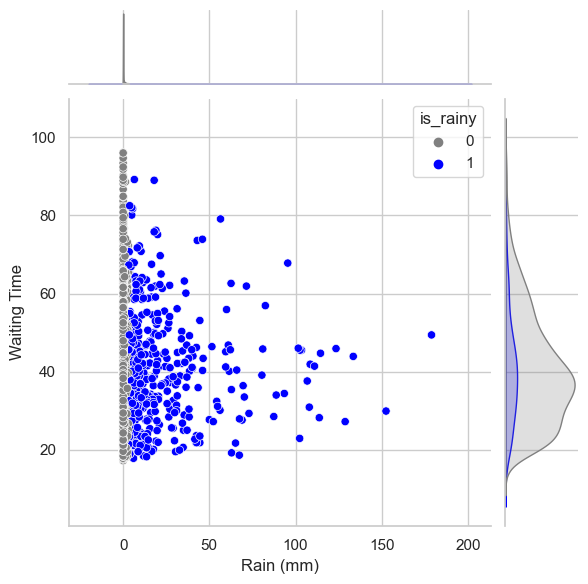

In [19]:
#강수량 & waititng_time
sns.set(style="whitegrid")
g = sns.jointplot(x='rain(mm)', y='waiting_time', data=df, hue='is_rainy', palette={0: 'gray', 1: 'blue'})
g.set_axis_labels("Rain (mm)", "Waiting Time")
plt.show()

- 강수량이 높으면 이용수도 적어진다.
- 다수의 이용은 25mm이하일때 이루어진다.
- 우리나라는 비오는 날이 많지 않기에, 큰 영향을 보이지 않는듯.

** 모델을 주말과 평일을 나눠서 제작하는 게 좋을까?
-> 금&토(weekday==5&6)
-> 일 월 화 수 목 금

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [20]:
#범주형데이터 
summarize_data(df[cat_col])

================= Numeric Summary =================
        weekday  month  week  year  season  is_holiday  is_rainy
count      2921   2921  2921  2921    2921        2921      2921
unique        7     12    53     8       4           2         2
top           3      1    27  2016  spring           0         0
freq        418    248    56   366     736        2787      2496

================= Categorical Summary =================
--- weekday ---
Frequency:
3    418
4    418
0    417
1    417
2    417
5    417
6    417
Name: weekday, dtype: int64

Percentage (%):
3    14.310168
4    14.310168
0    14.275933
1    14.275933
2    14.275933
5    14.275933
6    14.275933
Name: weekday, dtype: float64


--- month ---
Frequency:
1     248
3     248
5     248
7     248
8     248
10    248
12    247
4     240
6     240
9     240
11    240
2     226
Name: month, dtype: int64

Percentage (%):
1     8.490243
3     8.490243
5     8.490243
7     8.490243
8     8.490243
10    8.490243
12    8.456008
4

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

In [51]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_18076\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),target,ride_pro,humidity,temp
car_cnt,1.000000,0.885889,0.904672,0.035818,-0.844675,-0.857679,0.108709,0.109642,0.002522,0.048723,0.087955,0.076322,0.087627,-0.028579,0.077138,0.110240
request_cnt,0.885889,1.000000,0.988752,0.291891,-0.850307,-0.847743,0.058275,0.054250,-0.012944,-0.014331,-0.000850,0.024185,0.316181,-0.251501,-0.007798,0.056803
ride_cnt,0.904672,0.988752,1.000000,0.184340,-0.867915,-0.858609,0.064615,0.058540,-0.015894,-0.008583,0.005979,0.040210,0.229127,-0.117787,-0.000809,0.062166
waiting_time,0.035818,0.291891,0.184340,1.000000,0.020257,-0.013197,0.040863,0.034330,-0.005741,-0.040792,-0.087113,-0.044288,0.732299,-0.770386,-0.072601,0.037951
fare,-0.844675,-0.850307,-0.867915,0.020257,1.000000,0.977569,0.083566,0.070480,0.011502,0.020689,-0.035068,0.009283,-0.048772,0.008010,-0.010342,0.077749
distance,-0.857679,-0.847743,-0.858609,-0.013197,0.977569,1.000000,0.087728,0.073549,0.004975,0.021414,-0.039683,-0.000227,-0.083855,0.048106,-0.012720,0.081397
temp_max,0.108709,0.058275,0.064615,0.040863,0.083566,0.087728,1.000000,0.961606,0.116899,0.306681,0.284707,0.475346,0.044556,0.023888,0.325495,0.990284
temp_min,0.109642,0.054250,0.058540,0.034330,0.070480,0.073549,0.961606,1.000000,0.201830,0.401164,0.462051,0.308519,0.033645,0.013379,0.479116,0.990425
rain(mm),0.002522,-0.012944,-0.015894,-0.005741,0.011502,0.004975,0.116899,0.201830,1.000000,0.335411,0.446532,-0.285466,0.028373,-0.004565,0.436421,0.161073
humidity_max(%),0.048723,-0.014331,-0.008583,-0.040792,0.020689,0.021414,0.306681,0.401164,0.335411,1.000000,0.638767,-0.203877,-0.036768,0.052616,0.889009,0.357542


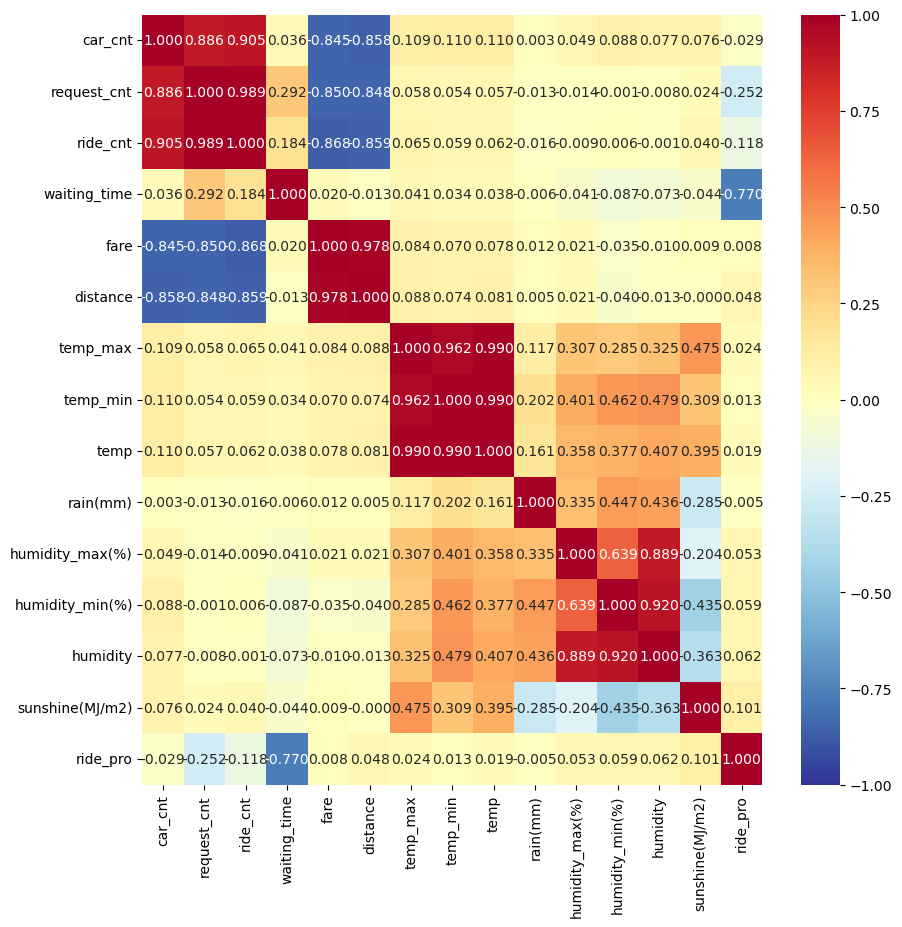

In [14]:
plt.figure(figsize = (10,10 ))
sns.heatmap(df_des.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

#### 2) 산점도

In [15]:
# sns.pairplot(df)
# plt.show()

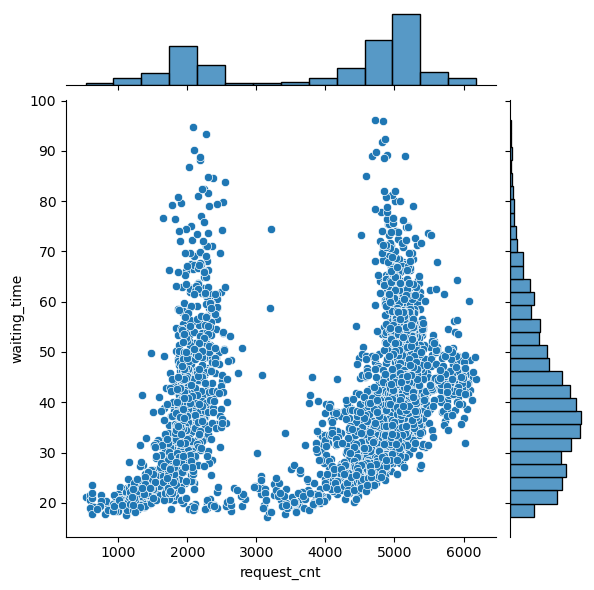

In [16]:
sns.jointplot(x='request_cnt', y='waiting_time', data = df)
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [55]:
df=df.dropna()

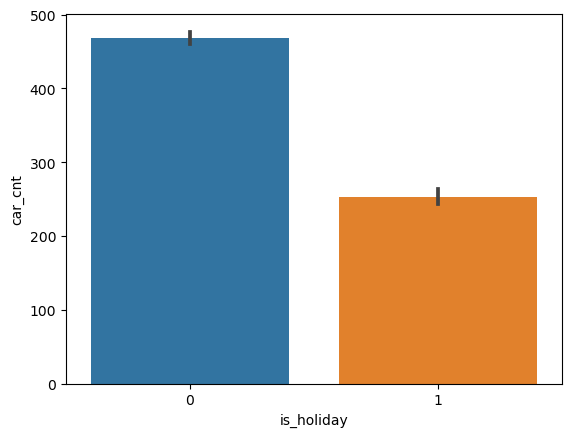

In [32]:
var = 'is_holiday'
target='car_cnt'
sns.barplot(x=var, y=target, data = df)
plt.show()

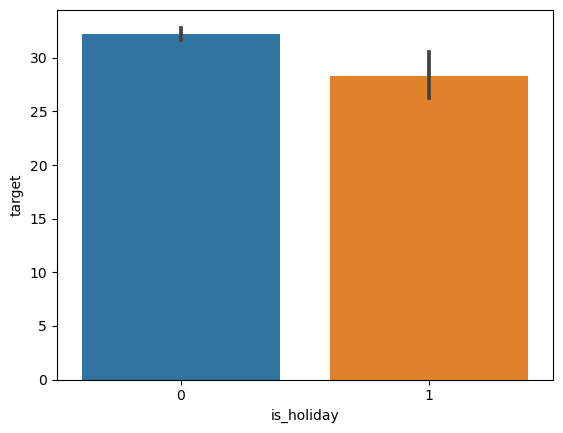

In [33]:
var = 'is_holiday'
target='target'
sns.barplot(x=var, y=target, data = df)
plt.show()

In [53]:
#주말과 평일의 target값은 유의미한 차이가 없다.
var = 'is_holiday'
target = 'target'

# 'is_holiday' 값이 0과 1인 두 그룹 생성
d_0 = df.loc[df[var] == 0, target]
d_1 = df.loc[df[var] == 1, target]

# ANOVA 검정 수행
f_statistic, p_value = f_oneway(d_0, d_1)

print("F-statistic:", f_statistic)
print("p-value:", p_value)
### 귀무가설 기각. 'is_holiday' 그룹 간의 'waiting_time' 변수에 유의미한 차이가 있다

F-statistic: 23.671116347950925
p-value: 1.203496181307577e-06


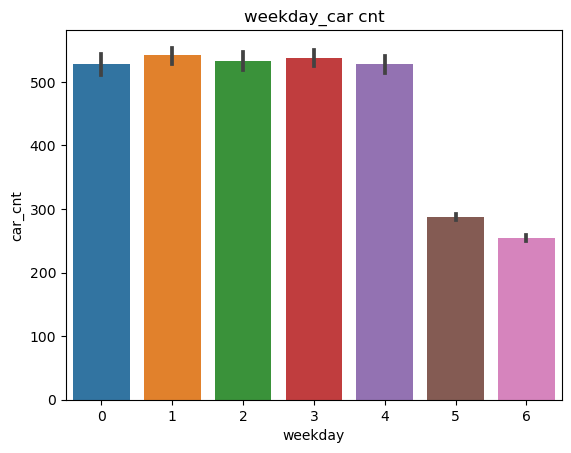

In [35]:
var = 'weekday'
target='car_cnt'
sns.barplot(x=var, y=target, data = df)
plt.title("weekday_car cnt")
plt.show()

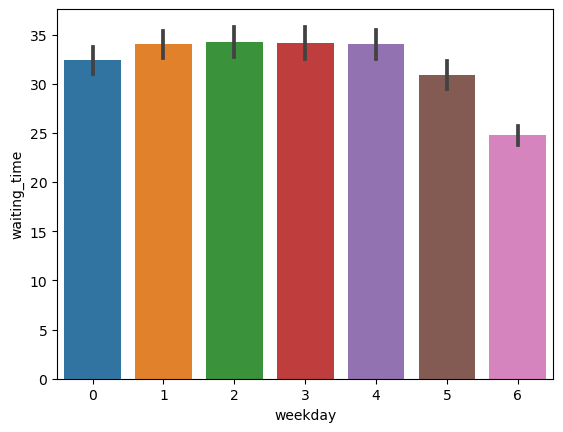

In [36]:
var = 'weekday'
target='waiting_time'
sns.barplot(x=var, y=target, data = df)
plt.show()

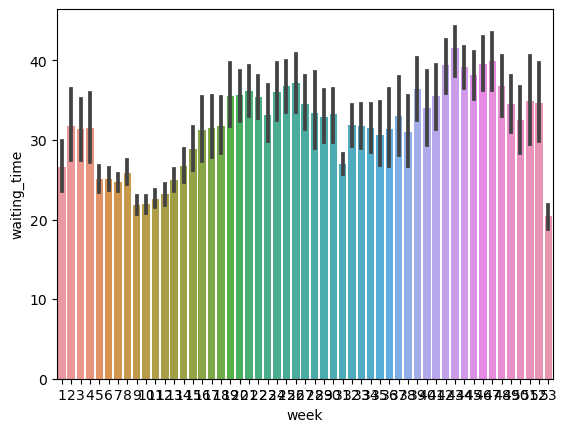

In [37]:
var = 'week'
target='waiting_time'
sns.barplot(x=var, y=target, data = df)
plt.show()

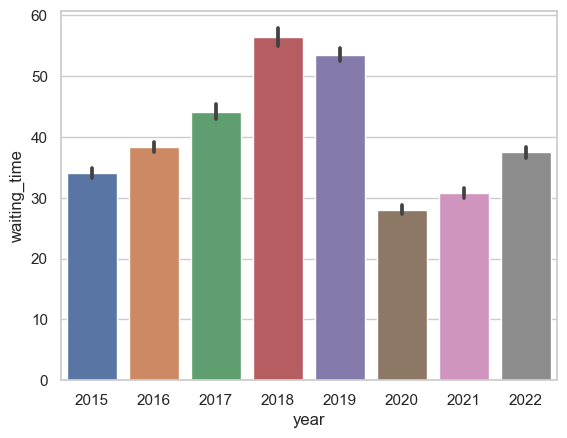

In [56]:
var = 'year'
target='waiting_time'
sns.barplot(x=var, y=target, data = df)
plt.show()

In [57]:
#year간의 target값은 유의미한 차이가 없다.
var = 'year'
target = 'target'

# 'is_holiday' 값이 0과 1인 두 그룹 생성
d_2015= df.loc[df[var] == 2015, target]
d_2016=df.loc[df[var] == 2016, target]
d_2017=df.loc[df[var] == 2017, target]
d_2018=df.loc[df[var] == 2018, target]
d_2019=df.loc[df[var] == 2019, target]
d_2020=df.loc[df[var] == 2020, target]
d_2021=df.loc[df[var] == 2021, target]
d_2022=df.loc[df[var] == 2022, target]

In [58]:
# 코로나 이전 ANOVA
f_statistic, p_value = f_oneway(d_2015, d_2016,d_2017,d_2018,d_2019)
#,d_2019,d_2020,d_2021,d_2021,d_2022

print("F-statistic:", f_statistic)
print("p-value:", p_value)
### 귀무가설 기각. (코로나 이전)year 그룹 간의 'waiting_time' 변수에 유의미한 차이가 있다

F-statistic: 261.38077076521176
p-value: 1.2960996927332446e-177


In [41]:
f_statistic, p_value = f_oneway(d_2020,d_2021,d_2021,d_2022)
#,d_2019,d_2020,d_2021,d_2021,d_2022

print("F-statistic:", f_statistic)
print("p-value:", p_value)
### 귀무가설 기각. (코로나 이후)year 그룹 간의 'waiting_time' 변수에 유의미한 차이가 있다

F-statistic: 84.10541464074319
p-value: 3.4827449950336087e-50


In [59]:
f_statistic, p_value = f_oneway(d_2015, d_2016,d_2017,d_2018,d_2019,d_2020,d_2021,d_2021,d_2022)
#,d_2019,d_2020,d_2021,d_2021,d_2022

print("F-statistic:", f_statistic)
print("p-value:", p_value)
### 귀무가설 기각. year 그룹 간의 'waiting_time' 변수에 유의미한 차이가 있다

F-statistic: 365.27298912981723
p-value: 0.0


In [45]:
## covie 변수 추가
df['year'] = df['year'].astype(int)
df.loc[df['year'] >= 2020, 'covid'] = 1
df

C:\Users\user\AppData\Local\Temp\ipykernel_18076\299739408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),...,month,week,year,season,is_holiday,ride_pro,humidity,temp,is_rainy,covid
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,198,1916,1156,30.3,2365,9911,3.8,-0.7,0.0,74.0,...,1,1,2020,winter,1,60.33,65.0,1.55,0,1.0
2020-01-02,384,4834,3524,36.7,2221,8470,4.3,-3.3,0.0,86.0,...,1,1,2020,winter,0,72.90,57.0,0.50,0,1.0
2020-01-03,389,4766,3645,39.8,2222,8416,6.1,-2.7,0.0,64.0,...,1,1,2020,winter,0,76.48,48.5,1.70,0,1.0
2020-01-04,239,2159,1640,27.5,2407,10002,6.5,-3.1,0.0,61.0,...,1,1,2020,winter,0,75.96,45.0,1.70,0,1.0
2020-01-05,196,1943,1640,34.6,2415,10148,4.5,0.7,1.2,94.0,...,1,1,2020,winter,0,84.41,67.0,2.60,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,603,5555,4605,39.2,2163,7889,3.0,-7.3,0.0,86.0,...,12,52,2022,winter,0,82.90,68.5,-2.15,0,1.0
2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,92.0,...,12,52,2022,winter,0,82.59,66.0,-2.85,0,1.0
2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,71.0,...,12,52,2022,winter,0,82.21,52.5,-3.05,0,1.0


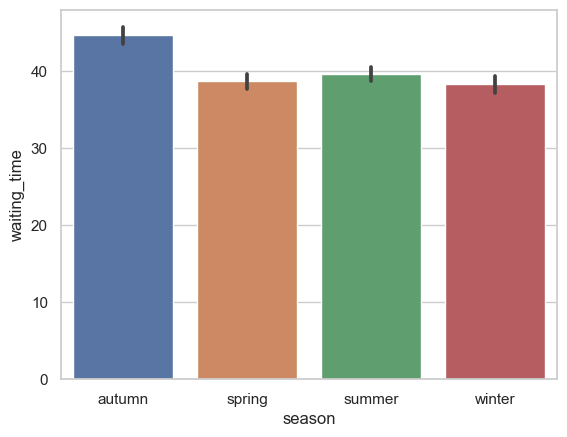

In [60]:
var = 'season'
target='waiting_time'
sns.barplot(x=var, y=target, data = df)
plt.show()

In [44]:
#계절간의 target값은 유의미한 차이가 없다.
var = 'season'
target = 'target'

# 'is_holiday' 값이 0과 1인 두 그룹 생성
d_winter = df.loc[df[var] == 'winter', target]
d_spring = df.loc[df[var] == 'spring', target]
d_summer = df.loc[df[var] == 'summer', target]
d_autumn = df.loc[df[var] == 'autumn', target]

# ANOVA 검정 수행
f_statistic, p_value = f_oneway(d_winter, d_spring,d_summer,d_autumn)

print("F-statistic:", f_statistic)
print("p-value:", p_value)
### 귀무가설 기각. 'season' 그룹 간의 'target' 변수에 유의미한 차이가 있다

F-statistic: 40.330225932423915
p-value: 1.0206134861094192e-24


## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [45]:
import joblib

# 데이터프레임을 저장할 경로 및 파일 이름
file_path = 'data2.pkl'

# 데이터프레임 저장
joblib.dump(df, file_path)

['data2.pkl']